![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

INTRODUCTION TO THE ASSIGNMENT

## Our objective is to train a neural network using MNIST dataset to get accuracy of at least 80% on validation data set.

## First it is worth acquiring, understanding and preparing the MNIST dataset before using it.

## I will Use the keras API integrated within TensorFlow API library

## Our tools are dataset of samples(inputs) and corresponding labels(targets) from the samples
## Example: Training image classification for each sample our label will be corresponding to that image sample

## Our goal is to train neural network thus we need to make sure that our data is in a format that our neural network can accept

## Convolutional neural networks are able to detect patterns in images.With each convolutional layer, we need to specify the number of filters (The number of filters determines the number of output channels) the layer should have. These filters are actually what detect the patterns( edges, shapes,textures,curves,objects,colors). Deeper the network goes, the more sophisticated the filters become

## Model for this assignment will be "Sequential Model" - from keras API integrated within TensorFlow

## Sequential model receives data whenever we call fit function so we need to understand data format that fit function accepts.




## 1. Libraries

To start, let's load those libraries that we need

## Data Preparation and Preprocessing

In [1]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
from tensorflow import keras as ks
from tensorflow.keras import Model
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import mean_squared_error
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, InputLayer, Multiply
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
import numpy as np
import time
import datetime

## 2. We prepare the data (Load Dataset)

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

**Important detail:**
> The neural network requires that the inputs be real numbers, and we will do it by forcing the division of the values ​​within the 32x32 matrices (which have values​​ from 0 to 255) by 255.0 (a real)

In [2]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 2s 0us/step


## Understand the MNIST dataset
## In Kears, the MNIST dataset is loaded with train and test sets. So, we do not need to create train and test parts manually

## The train and test labels are one-dimensional. They contain the correspondent labels for 10 categories (0 to 9)

## Prepare Pixel Data
We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [3]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 x_train = train.astype('float32')
 x_test_labels = test.astype('float32')
 # normalize to range 0-1
 x_train = x_train / 255.0
 x_test = x_test/ 255.0
 # return normalized images
 return x_train, x_test

In [4]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


## Getting the shape of the data


In [5]:
#Get Shape of first train image
x_train[0].shape

(32, 32, 3)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

## Visualizing individual images
## Visualize the first nine images in the MNIST train set

## Let's print a sample of the images from the CIFAR10 dataset, to see if it looks anything like what we expect.

## A plot of the first nine images in the dataset is  created. It is clear that the images are indeed very small compared to modern photographs; it can be challenging to see what exactly is represented in some of the images given the extremely low resolution.

## This low resolution is likely the cause of the limited performance that top-of-the-line algorithms are able to achieve on the dataset.

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


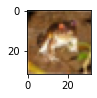

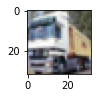

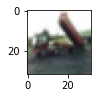

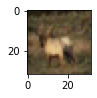

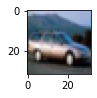

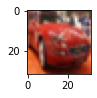

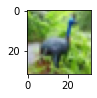

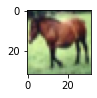

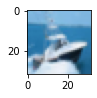

In [60]:
# Lets print a sample of the images of MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
 # define subplot
    plt.subplot(330 + 1 + i)
 # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
    plt.show()

## The (50000, 32, 32, 3) means the train set contains 50,000 images of 32 x 32 px. In other words, it is an array containing 50,000 matrices of 32 x 32 integer values pixels and color, with three channels. 
## The entire dataset contains 50,000 training samples (images) with 50,000 corresponding labels (targets or ground truths) and 10,000 testing samples (images) with 10,000 corresponding labels. 

## MNIST data representation in deep learning
## A batch of grayscale images (e.g. the entire MNIST train set) can be represented using a three-dimensional (3D) NumPy array or a tensor. Here, we need an extra dimension to represent the number of images

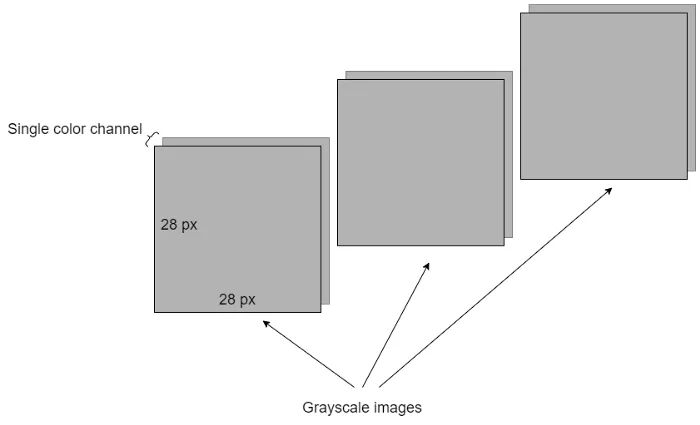

It is better to use a separate validation dataset, e.g. by splitting the train dataset into train and validation sets (I will split train dataset into 40000 train and 10000 validation datasets).

This will result in a trace of model evaluation scores on the train and test dataset each epoch that can be plotted later.

In [10]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [11]:
# We validate the result
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)



## 3. Definition of the Assignment: Create Five neural network Models 

## Architecture of the network

We build a simple neural network model for the MNIST data, which in summary are:
- Input data: 32x32 pixel images with a gray channel (values ​​from 1 to 256, integers)
- Output data (labels): we give each image a value from 0 to 9, a total of 10 classes

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/Examples-from-the-MNIST-dataset.png">

To assemble the architecture of the neural network, the method **.Sequential()** of Keras (from input to output) is followed:

- **Input** - A conversion of a 32x32 pixel 2D matrix to a vector 
- **Hidden** - A dense layer (fully connected) with 16 neurons and linear activation
- **Output** - A dense layer (fully connected) with 10 neurons (**the 10 output classes**) and linear activation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/399px-Colored_neural_network.svg.png" alt="" decoding="async" width="300" height="361" class="thumbimage">


**Baseline Mode**l will establish a minimum model performance to which all of my other models can be compared, as well as a model architecture that I can use as the basis of study and improvement
## My model archeticture involves stacking convolutional layers followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64 for the first two blocks. Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs.

## **Initially** I will define the feature detector part then I will couple it with a classifier part that interprets the features and makes a prediction as to which class a given photo belongs. This can be fixed for each model I investigate. Note that the feature maps output from the feature extraction part of the model must be flattened and the output layer must have 10 nodes for the 10 classes and use the softmax activation function.

## **Optimize my model (Using stochastic gradient descent)**
# I will use  a modest learning rate of 0.001 and a large momentum of 0.9, both of which are good general starting points. The model will optimize the categorical cross entropy loss function required for multi-class classification and will monitor classification accuracy

## Finally I will Compile my model and run my function define_model()


## **Note** When we add convolutions, we need to "pre-treat the data", because **the convolution expects an array of 4 fields** (more like "images"), in the case of MNIST. CIFAR10 already has the right shape, so we don't have to do anything, but as we always say: you better check its size.

##Therefore, when exiting the Convolution, you have to do a Flatten(Fully Connected Input Layer), because fully connected Dense layers expect arrays, not matrices !!



In [58]:
#My model network archeticture for baseline model-01 (Baseline+Batch Normalization) - 2 blocks depth of 32,64 consist of 4 Conv filters, 2 downsampling Pooling layers, 3 BatchNorm, and 5 fully connected layers
# define cnn model
model = ks.Sequential()
model.add(Conv2D(32, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(32, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(64, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=1))


#Output part of the model
model.add(Flatten())
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
  
#review my model
model.summary()



 

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_129 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_129 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_130 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_130 (Ba  (None, 16, 16, 64)     

## Compile, Fit, Evaluate Model-01

In [59]:
#compile,fit, and evaluate
#Optimize my model 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, epochs=30, use_multiprocessing=False, batch_size=64, 
                    validation_data=(x_val,y_val),steps_per_epoch= 100)

#evaluate model
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Acuuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation Accuracy:> %.3f' % (acc * 100.0))




Epoch 1/30
100/100 [==============================] - 6s 62ms/step - loss: 2.2675 - accuracy: 0.1503 - val_loss: 2.2268 - val_accuracy: 0.1562
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 2.1951 - accuracy: 0.1573 - val_loss: 2.1985 - val_accuracy: 0.1670
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 2.1493 - accuracy: 0.1650 - val_loss: 2.1314 - val_accuracy: 0.1794
Epoch 4/30
100/100 [==============================] - 6s 56ms/step - loss: 2.1249 - accuracy: 0.1789 - val_loss: 2.1187 - val_accuracy: 0.1983
Epoch 5/30
100/100 [==============================] - 7s 73ms/step - loss: 2.0579 - accuracy: 0.2081 - val_loss: 2.0360 - val_accuracy: 0.1999
Epoch 6/30
100/100 [==============================] - 6s 56ms/step - loss: 2.0010 - accuracy: 0.2516 - val_loss: 1.9862 - val_accuracy: 0.2413
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 1.9213 - accuracy: 0.2708 - val_loss: 1.8955 - val_accuracy: 0.2833

##Train Acuuracy: > 63.332
##Test Accuracy: > 59.010
##Validation Accuracy:> 59.150

## Check Elapsed Time of Model-01



In [61]:
#Check Elapsed Time
t = time.perf_counter()
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time)

Training time: 0:00:00.000036


## Visualize Baseline-01 model Output

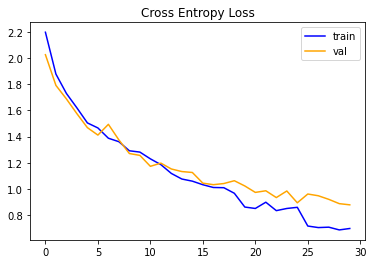

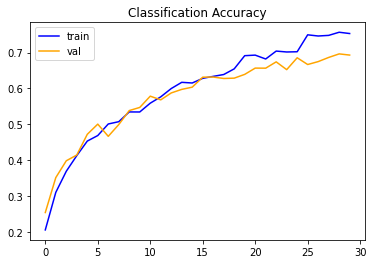

In [65]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

## Conclusion

In this case, we can see that the model rapidly overfits the validation dataset. This is clear if we look at the plot of loss (top plot), we can see that the model’s performance on the training dataset (blue) continues to improve whereas the performance on the test dataset (orange) improves, then starts to get worse and fluctuates at around 15 epochs.

Training Graph: Cross Entropy Loss starts at 2 at 0 epoch and then is reducing nicely from 2 at 0 epoch to less than0.25 at 30 epoch
Validation Graph: Cross entropy loss starts at 1.75 loss and then reduces until it reaches around 1.125 error at around 13 epoch. Then from that point it starts going up then fluctuates until it overshoots to error 2 at 30 epoch (due to overfitting) 

## Baseline model-02

In [63]:
#My model network archeticture for baseline model-02 - (Baseline+Batch Normalization) - 3 blocks depth 132,256,512
# define cnn model
model = ks.Sequential()
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

#Output part of the model
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(10, activation='softmax'))

#review my model
model.summary()




 

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 32, 32, 132)       3696      
                                                                 
 batch_normalization_132 (Ba  (None, 32, 32, 132)      128       
 tchNormalization)                                               
                                                                 
 conv2d_133 (Conv2D)         (None, 32, 32, 132)       156948    
                                                                 
 batch_normalization_133 (Ba  (None, 32, 32, 132)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 16, 16, 132)      0         
 g2D)                                                            
                                                     

## Compile, Fit, Evaluate Model-02

In [64]:
#compile,fit, and evaluate
#Optimize my model 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, epochs=30, use_multiprocessing=False, batch_size=64, 
                    validation_data=(x_val,y_val),steps_per_epoch= 100)

#evaluate model
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Acuuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation Accuracy:> %.3f' % (acc * 100.0))




Epoch 1/30
100/100 [==============================] - 9s 92ms/step - loss: 2.1971 - accuracy: 0.2059 - val_loss: 2.0254 - val_accuracy: 0.2544
Epoch 2/30
100/100 [==============================] - 9s 94ms/step - loss: 1.8775 - accuracy: 0.3105 - val_loss: 1.7910 - val_accuracy: 0.3517
Epoch 3/30
100/100 [==============================] - 10s 97ms/step - loss: 1.7293 - accuracy: 0.3694 - val_loss: 1.6874 - val_accuracy: 0.3986
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 1.6190 - accuracy: 0.4130 - val_loss: 1.5746 - val_accuracy: 0.4146
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: 1.5040 - accuracy: 0.4534 - val_loss: 1.4678 - val_accuracy: 0.4723
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 1.4656 - accuracy: 0.4689 - val_loss: 1.4110 - val_accuracy: 0.5007
Epoch 7/30
100/100 [==============================] - 10s 98ms/step - loss: 1.3870 - accuracy: 0.5011 - val_loss: 1.4933 - val_accuracy: 0.46

##Train Acuuracy: > 80.467
##Test Accuracy: > 69.650
##Validation Accuracy:> 69.310

## Check Elapsed Time of Model



In [66]:
#Check Elapsed Time
t = time.perf_counter()
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time)

Training time: 0:00:00.000044


## Visualize Baseline-02 model Output

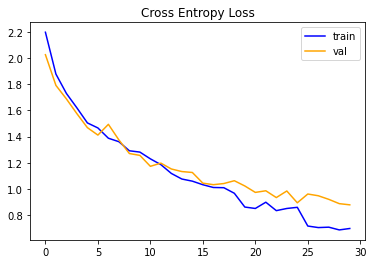

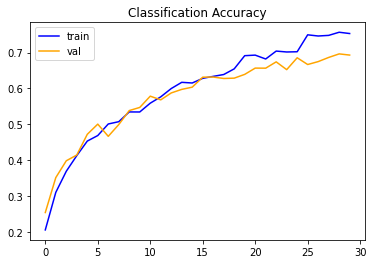

In [67]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

## Conclusion

In this case, we can see that the model overfits the validation dataset. This is clear if we look at the plot of loss (top plot), we can see that the model’s performance on the training dataset (blue) continues to improve whereas the performance on the test dataset (orange) improves, then starts to get worse and fluctuates at around 15 epochs.

Training Graph: Cross Entropy Loss is reducing nicely from above 2 at 0 epoch to less than 0.25 at 30 epoch
Validation Graph: Cross entropy loss starts at 2 at 0 epochs, reduces to 1.25 at 15 epoch and then starts fluctuating from 15-30 epoch until it error overshoots above 2 error  (due to overfitting) 

## Baseline model-03

In [68]:
#My model network archeticture for baseline model-03 - (Baseline+Batch Normalization) - 4 blocks depth 132,256,512,1024
# define cnn model
model = ks.Sequential()
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(1024, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(1024, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))


#Output part of the model
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#review my model
model.summary()




 

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 32, 32, 132)       3696      
                                                                 
 batch_normalization_135 (Ba  (None, 32, 32, 132)      128       
 tchNormalization)                                               
                                                                 
 conv2d_139 (Conv2D)         (None, 32, 32, 132)       156948    
                                                                 
 batch_normalization_136 (Ba  (None, 32, 32, 132)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 16, 16, 132)      0         
 g2D)                                                            
                                                     

## Compile, Fit, Evaluate Model-03

In [69]:
#compile,fit, and evaluate
#Optimize my model 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, epochs=30, use_multiprocessing=False, batch_size=64, 
                    validation_data=(x_val,y_val),steps_per_epoch= 100)

#evaluate model
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Acuuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation Accuracy:> %.3f' % (acc * 100.0))




Epoch 1/30
100/100 [==============================] - 14s 136ms/step - loss: 2.1947 - accuracy: 0.2361 - val_loss: 2.2154 - val_accuracy: 0.2234
Epoch 2/30
100/100 [==============================] - 12s 124ms/step - loss: 1.7679 - accuracy: 0.3550 - val_loss: 1.7364 - val_accuracy: 0.3900
Epoch 3/30
100/100 [==============================] - 12s 124ms/step - loss: 1.6673 - accuracy: 0.3802 - val_loss: 1.5762 - val_accuracy: 0.4184
Epoch 4/30
100/100 [==============================] - 12s 123ms/step - loss: 1.5616 - accuracy: 0.4288 - val_loss: 1.5267 - val_accuracy: 0.4393
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 1.5257 - accuracy: 0.4531 - val_loss: 1.4903 - val_accuracy: 0.4491
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 1.4644 - accuracy: 0.4656 - val_loss: 1.3788 - val_accuracy: 0.5032
Epoch 7/30
100/100 [==============================] - 12s 122ms/step - loss: 1.3363 - accuracy: 0.5122 - val_loss: 1.3784 - val_ac

##Train Acuuracy: > 81.362
##Test Accuracy: > 68.530
##Validation Accuracy:> 69.760

## Check Elapsed Time of Model



In [70]:
#Check Elapsed Time
t = time.perf_counter()
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time)

Training time: 0:00:00.000063


## Visualize Baseline-03 model Output

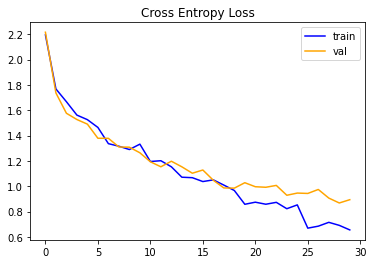

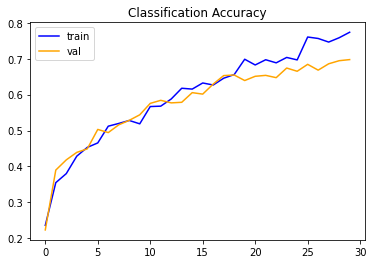

In [71]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()


In this case, I used in total 2x4 convolution layers. progressive, starting with 132 to 1024 kernels.
and in the end 2 dense layers with 512 & 1024 kernels + the batch normalisatio. I can see that the model rapidly overfits the validation dataset. This is clear if we look at the plot of loss (top plot), we can see that the model’s performance on the training dataset (blue) continues to improve whereas the performance on the test dataset (orange) improves, then starts to get worse and fluctuates at around 15 epochs.

Training Graph: 100% complete fit (no loss)
Validation Graph: Cross entropy loss starts at approx. 1.50 at 0 epochs, then goes down to reach approx. 0.80 at 5 epoch then fluctuates and overshoots to above 1.50 at 30 epoch.(due to overfitting)

## Discussion
I have explored three different models.

The results can be summarized below, although I must assume some variance in these results given the stochastic nature of the algorithm:

##Model 1: 65.880% (validation test)
##Model 2: 76.100% (validation test)
##Model 3: 76.330% (validation test)
## In all cases, the model was able to learn the training dataset, showing an improvement on the training dataset that at least continued to 30 epochs, and perhaps more. This is a good sign, as it shows that the problem is learnable and that all three models have sufficient capacity to learn the problem.

## The results of the model on the test dataset showed an improvement in classification accuracy with each increase in the depth of the model. It is possible that this trend would continue if models with five and six layers were evaluated, and this might make an interesting extension. Nevertheless, all three models showed the same pattern of dramatic overfitting at around 15-to-20 epochs.

## These results suggest that the model with three convolution layers is a good starting point or baseline model for our investigation.

## The results also suggest that the model is in need of regularization to address the rapid overfitting of the validation dataset. More generally, the results suggest that it may be useful to investigate techniques that slow down the convergence (rate of learning) of the model. This may include combining techniques such as dropouts and batch normalization and data augmentation.

## In the next section, I will investigate some of these ideas for improving model performance. I will create Model-04 combining Dropout and Data Augmentation and Model-05 combining Dropout and Batch Normalization and I will give comparison between the two models in terms of performance.

## Developing Improved Models

## Now that I have established 3 baseline models, with three and four blocks, we can investigate modifications to the model and the training algorithm that seek to improve performance.

## We will look at two main areas first to address the severe overfitting observed, namely regularization and data augmentation.

## Regularization Techniques
## Based on the nature of the overfitting observed above techniques that slow down the rate of convergence might be useful. Hence I will look into the effect of both dropout and Data Augmentation.



## **Model-04** Dropout and Batch Normalization
##In this model my goal is to study whether combining 2 regularization techniques together will result in a better performance than using batch normalization technique (as I did with the previous three baseline models).
##Specifically my aim is to check whether using both regularization techniques together results in better performance than using Batch Normalization technique alone.

## The updated model definition is listed below.
 
## The updated Model - 04  model (Fixed Dropout and Batch Normalization)


In [72]:
#My model network archeticture for baseline model-03 - (Baseline+Batch Normalization) - 4 blocks depth 132,256,512,1024
# define cnn model
model = ks.Sequential()
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(1024, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Output part of the model
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#review my model
model.summary()




 

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 32, 32, 132)       3696      
                                                                 
 batch_normalization_140 (Ba  (None, 32, 32, 132)      528       
 tchNormalization)                                               
                                                                 
 conv2d_147 (Conv2D)         (None, 32, 32, 132)       156948    
                                                                 
 batch_normalization_141 (Ba  (None, 32, 32, 132)      528       
 tchNormalization)                                               
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 16, 16, 132)      0         
 g2D)                                                            
                                                     

**Early Stopping**

We prevent overfitting by stopping when after 10 epochs and the validation error does not decrease (we are in a plateau)

In [73]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

## Compile, Fit, Evaluate Model -04

In [74]:
#compile,fit, and evaluate
#Optimize my model 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, epochs=60, use_multiprocessing=False, batch_size=64, 
                    validation_data=(x_val,y_val),steps_per_epoch= 100)

#evaluate model
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Acuuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation Accuracy:> %.3f' % (acc * 100.0))




Epoch 1/60
100/100 [==============================] - 14s 142ms/step - loss: 2.4844 - accuracy: 0.2463 - val_loss: 6.0902 - val_accuracy: 0.1433
Epoch 2/60
100/100 [==============================] - 15s 149ms/step - loss: 1.9900 - accuracy: 0.3369 - val_loss: 1.6426 - val_accuracy: 0.4295
Epoch 3/60
100/100 [==============================] - 15s 146ms/step - loss: 1.7719 - accuracy: 0.3858 - val_loss: 1.5785 - val_accuracy: 0.4531
Epoch 4/60
100/100 [==============================] - 14s 143ms/step - loss: 1.6866 - accuracy: 0.4108 - val_loss: 1.5300 - val_accuracy: 0.4537
Epoch 5/60
100/100 [==============================] - 14s 142ms/step - loss: 1.5980 - accuracy: 0.4477 - val_loss: 1.4153 - val_accuracy: 0.4952
Epoch 6/60
100/100 [==============================] - 14s 142ms/step - loss: 1.5441 - accuracy: 0.4595 - val_loss: 1.4493 - val_accuracy: 0.4854
Epoch 7/60
100/100 [==============================] - 14s 143ms/step - loss: 1.4767 - accuracy: 0.4719 - val_loss: 1.4304 - val_ac

##Train Acuuracy: > 85.013
##Test Accuracy: > 75.230
##Validation Accuracy:> 75.500

##Note: I noticed my results  vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. I run the example a few times and compare the average outcome.

## Conclusion

##Here adding the Fixed Dropout layers together with the BatchNormalization improved the model performance (still not achieving the objectives although close to it).Also not to forget adding steps between my epochs reduced waiting time and enhanced model performance.
##Model-04 Accuarcy:



## Plot the Results of Model-04

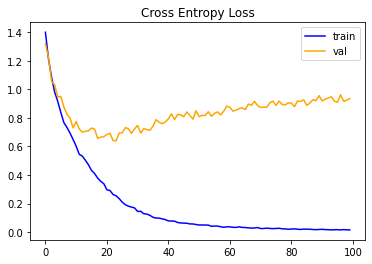

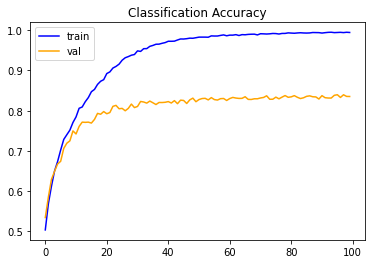

In [54]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

## **Model-05** - Dropout and Batch Normalization (Expanded Version)

## In previous model I can monitor that Dropout is working very well. Next model I will add some extra remediation steps to my model to increase number of training epochs to 100 and add steps for early stop to 500 to give model more of an opportunity to improve. Next, I can add batch normalization in an effort to stabilize the learning and perhaps accelerate the learning process. To offset this acceleration.

## The updated model definition is listed below.
 
## The updated Model - 05  model (Dropout and Batch Normalization with increased epoch=100 and increased step per stop=500)


In [47]:
#My model network archeticture for baseline model-03 - (Baseline+Batch Normalization) - 4 blocks depth 132,256,512,1024
# define cnn model
model = ks.Sequential()
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(132, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(1024, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), strides=1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Output part of the model
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#review my model
model.summary()




 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 32, 32, 132)       3696      
                                                                 
 batch_normalization_109 (Ba  (None, 32, 32, 132)      528       
 tchNormalization)                                               
                                                                 
 conv2d_113 (Conv2D)         (None, 32, 32, 132)       156948    
                                                                 
 batch_normalization_110 (Ba  (None, 32, 32, 132)      528       
 tchNormalization)                                               
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 16, 16, 132)      0         
 g2D)                                                            
                                                     

**Early Stopping**

We prevent overfitting by stopping when after 10 epochs and the validation error does not decrease (we are in a plateau). In next model I use steps per stop=500 for 100 epochs.

In [13]:
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)
callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=10)

## Compile, Fit, Evaluate Model -05

In [50]:
#compile,fit, and evaluate
#Optimize my model 
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(x_train, y_train, epochs=100, use_multiprocessing=False, batch_size=64, 
                    validation_data=(x_val,y_val),steps_per_epoch= 500)

#evaluate model
_, acc = model.evaluate(x_train, y_train, verbose=0)
print('Train Acuuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: > %.3f' % (acc * 100.0))

_, acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation Accuracy:> %.3f' % (acc * 100.0))




Epoch 1/100
500/500 [==============================] - 59s 117ms/step - loss: 1.4004 - accuracy: 0.5035 - val_loss: 1.3204 - val_accuracy: 0.5342
Epoch 2/100
500/500 [==============================] - 56s 112ms/step - loss: 1.2135 - accuracy: 0.5685 - val_loss: 1.2261 - val_accuracy: 0.5852
Epoch 3/100
500/500 [==============================] - 56s 111ms/step - loss: 1.0855 - accuracy: 0.6120 - val_loss: 1.0571 - val_accuracy: 0.6291
Epoch 4/100
500/500 [==============================] - 56s 112ms/step - loss: 0.9812 - accuracy: 0.6497 - val_loss: 1.0317 - val_accuracy: 0.6489
Epoch 5/100
500/500 [==============================] - 56s 112ms/step - loss: 0.9166 - accuracy: 0.6735 - val_loss: 0.9471 - val_accuracy: 0.6674
Epoch 6/100
500/500 [==============================] - 63s 127ms/step - loss: 0.8393 - accuracy: 0.7021 - val_loss: 0.9503 - val_accuracy: 0.6741
Epoch 7/100
500/500 [==============================] - 63s 126ms/step - loss: 0.7671 - accuracy: 0.7285 - val_loss: 0.8764 -

## Conclusion

The results suggest that both dropout and batchNormalization with increased number of epoch and controlled steps per epoch are having the desired effect.Now that the model is learning well, we can look for both improvements on what is working, as well as combinations on what is working.
##Model-05 Accuarcy:

### Train Acuuracy: > 99.998
### Test Accuracy: > 83.020
### Validation Accuracy:> 83.530

## Check Elapsed Time of Model

In [52]:
#Check Elapsed Time
t = time.perf_counter()
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time)

Training time: 0:00:00.000055


## Visualize Model-05 Output

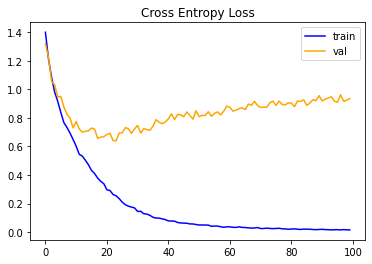

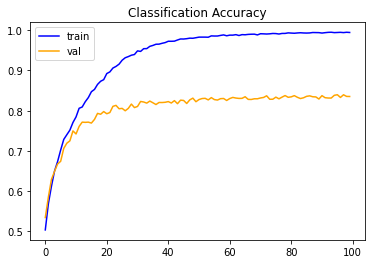

In [55]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

## FINAL TAKEAWAY (BASED ON MY MODELS)
## IN CONCLUSION I OBSERVED THAT COMBINING TWO REGULARIZATION TICHNIQUES IN ADDITION TO INCREASING THE EPOCHS CYCLES AS WELL AS CONTROLLED INCREASING STEPS PER EPOCHS AS MY REMEDIATION STEPS THAT I DID YIELDED THE BEST RESULTS OF TEST SET AND VALIDATION SET ACCURACIES BOTH ABOVE 80%. THE RESULTS ARE SATISFACTORY.
## I SAW LARGE IMPROVEMENT IN MODEL PERFORMANCE OF ABOUT 24% BETWEEN MY FIRST MODEL AND MY LAST MODEL
